!pip install BeautifulSoup4, lxml, mapbox, pandas, requests, IPython

In [1]:
import json, config
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
from mapbox import Geocoder
geocoder = Geocoder(access_token=config.api_key)

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_National_Hockey_League_arenas"

In [4]:
page = urlopen(url)

In [5]:
soup = BeautifulSoup(page, "lxml")

print(soup.prettify())

In [6]:
first_table = soup.find('table', class_= 'wikitable sortable')

In [7]:
A=[] #IMG
B=[] #Arena
C=[] #City
D=[] #Team
E=[] #Capacity
F=[] #Opened
G=[] #First Season
H=[] #State

In [8]:
for row in first_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==8:
        A.append(cells[0].find('img')['src'].replace("120px", "250px"))
        B.append(cells[1].find(text=True))
        #this splits the city and state then puts them in their own arrays.
        location = cells[2].find(text=True).split(',')

        C.append(location[0])
        H.append(location[1].lstrip())
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True).rstrip('\n'))
        F.append(cells[5].find(text=True).rstrip('\n').rstrip('\u2020').replace(' ', ''))
        G.append(cells[6].find(text=True).rstrip('\n').replace('\u2013', '-'))

In [9]:
import pandas as pd
df=pd.DataFrame(D,columns=['Team'])
df['Arena']=B
df['City']=C
df['State'] = H
df['Capacity']=E
df['opened']=F
df['firstSeason']=G
df['image']=A
df

,Team,Arena,City,State,Capacity,opened,firstSeason,image
0,Tampa Bay Lightning,Amalie Arena,Tampa,Florida,"19,092",1996,1996-97,//upload.wikimedia.org/wikipedia/commons/thumb...
1,Dallas Stars,American Airlines Center,Dallas,Texas,"18,532",2001,2001-02,//upload.wikimedia.org/wikipedia/commons/thumb...
2,Colorado Avalanche,Ball Arena,Denver,Colorado,"17,809",1999,1999-2000,//upload.wikimedia.org/wikipedia/commons/thumb...
3,Florida Panthers,BB&T Center,Sunrise,Florida,"19,250",1998,1998-99,//upload.wikimedia.org/wikipedia/commons/thumb...
4,Montreal Canadiens,Bell Centre,Montreal,Quebec,"21,302",1996,1995-96,//upload.wikimedia.org/wikipedia/commons/thumb...
5,Nashville Predators,Bridgestone Arena,Nashville,Tennessee,"17,113",1996,1998-99,//upload.wikimedia.org/wikipedia/commons/thumb...
6,Winnipeg Jets,Canada Life Centre,Winnipeg,Manitoba,"15,321",2004,2011-12,//upload.wikimedia.org/wikipedia/commons/thumb...
7,Ottawa Senators,Canadian Tire Centre,Ottawa,Ontario,"17,373",1996,1995-96,//upload.wikimedia.org/wikipedia/commons/thumb...
8,Washington Capitals,Capital One Arena,Washington,D.C.,"18,506",1997,1997-98,//upload.wikimedia.org/wikipedia/commons/thumb...
9,Seattle Kraken,Climate Pledge Arena,Seattle,Washington,"17,100",1962§,2021-22,//upload.wikimedia.org/wikipedia/commons/thumb...


In [10]:
location = [];
for i in range(len(B)):
    searchTerm = B[i] + ", " + C[i]
    #print(searchTerm)
    response = geocoder.forward(searchTerm)
    collection = response.json()
    data = collection['features'][0]['geometry']['coordinates']
    location.append(data[::-1])

In [11]:
response = geocoder.forward('Bell Centre,  Quebec')
collection = response.json()
data = collection['features'][0]['geometry']['coordinates']
#print(collection);

In [12]:
final_data = []
for i in range(len(A)):
    temp={}
    temp['Image'] = "HTTPS:" + A[i]
    temp['Team'] = D[i]
    temp['Arena'] = B[i]
    temp['Location'] = C[i]
    temp['Capacity'] = E[i]
    temp['opened'] = F[i]
    temp['First Season'] = G[i]
    temp['Coordinates'] = location[i]
    final_data.append(temp)

In [13]:
print(len(final_data))

32


In [14]:
with open('NHL.json', 'w') as outfile:
    json.dump(final_data, outfile)

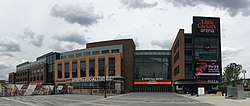

In [15]:
import requests, IPython.display as Disp
url = final_data[14]['Image']
Disp.Image(requests.get(url).content)

In [16]:
print(url)

HTTPS://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Little_Caesars_Arena_panorama.jpg/250px-Little_Caesars_Arena_panorama.jpg
